# Installing Tensorflow

In [1]:
!python --version

Python 3.8.5


In [2]:
#!pip install tensorflow

In [3]:
#!pip install tensorflow==2.0

In [4]:
#!pip install --ignore-installed --upgrade tensorflow==2.0

In [5]:
import tensorflow as tf
tf.__version__

'2.6.0'

# Keras Syntax Basics

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [9]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [10]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


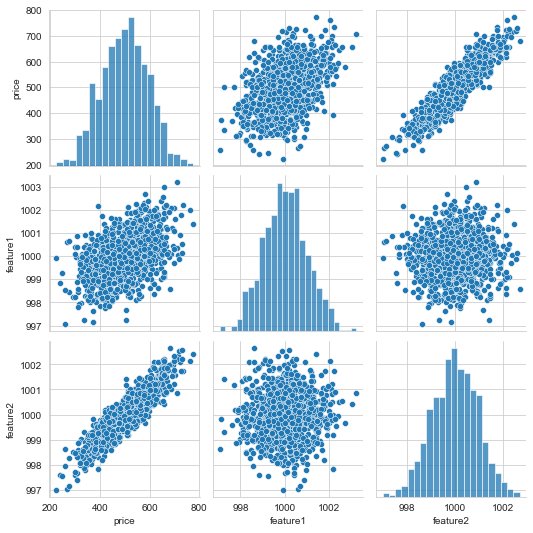

In [13]:
sns.pairplot(df);

In [14]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [17]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [18]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [20]:
X_train.shape

(700, 2)

In [21]:
X_test.shape

(300, 2)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [24]:
scaler = MinMaxScaler()

In [25]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
X_train.max()

1.0

In [27]:
X_train.min()

0.0

In [28]:
X_test.max()

1.0186515935232023

In [29]:
X_test.min()

-0.014108392024525074

## Modelling

In [30]:
import tensorflow as tf

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [32]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evaluation method (since it isn't yet buil

In [33]:
help(Dense)

Help on class Dense in module keras.layers.core:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every sub-t

In [34]:
# First way to create model

model = Sequential([Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [35]:
# Second way to create model (recommended)

model = Sequential()
model.add(Dense(units = 4, activation = "relu"))     # input_dim = X_train.shape[1] or input_shape = X_train.shape
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [36]:
X_train.shape[1]

2

In [37]:
model.compile(optimizer = "rmsprop", loss = "mse")

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [38]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 256691.1250
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256612.7031
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256526.5312
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256429.7656
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256321.5938
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256202.9531
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256072.9219
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255932.0625
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 255780.6406
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 255619.0469
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 255446.2812
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

22/22 [==============================] - 0s 1ms/step - loss: 90281.4062
Epoch 97/250
22/22 [==============================] - 0s 2ms/step - loss: 86200.5156
Epoch 98/250
22/22 [==============================] - 0s 2ms/step - loss: 82146.6562
Epoch 99/250
22/22 [==============================] - 0s 2ms/step - loss: 78106.3906
Epoch 100/250
22/22 [==============================] - 0s 1ms/step - loss: 74027.9766
Epoch 101/250
22/22 [==============================] - 0s 2ms/step - loss: 69993.4297
Epoch 102/250
22/22 [==============================] - 0s 902us/step - loss: 66004.6484
Epoch 103/250
22/22 [==============================] - 0s 1ms/step - loss: 62027.6914
Epoch 104/250
22/22 [==============================] - 0s 1ms/step - loss: 58099.1523
Epoch 105/250
22/22 [==============================] - 0s 1ms/step - loss: 54236.0625
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 50406.2188
Epoch 107/250
22/22 [==============================] - 0s 2ms/step - 

22/22 [==============================] - 0s 997us/step - loss: 729.9969
Epoch 193/250
22/22 [==============================] - 0s 1ms/step - loss: 714.2467
Epoch 194/250
22/22 [==============================] - 0s 950us/step - loss: 698.6266
Epoch 195/250
22/22 [==============================] - 0s 902us/step - loss: 684.9880
Epoch 196/250
22/22 [==============================] - 0s 1ms/step - loss: 671.5358
Epoch 197/250
22/22 [==============================] - 0s 997us/step - loss: 658.2606
Epoch 198/250
22/22 [==============================] - 0s 902us/step - loss: 645.4037
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 631.2546
Epoch 200/250
22/22 [==============================] - 0s 1ms/step - loss: 617.8751
Epoch 201/250
22/22 [==============================] - 0s 1ms/step - loss: 603.1833
Epoch 202/250
22/22 [==============================] - 0s 950us/step - loss: 591.1866
Epoch 203/250
22/22 [==============================] - 0s 1ms/step - loss: 577

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.8751869 , -0.8851578 ,  0.10961106,  2.756853  ],
        [ 0.00672872, -0.87852407,  0.25992608,  5.4727874 ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([-0.0062918,  0.       , -0.3348955,  1.4544172], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.7750871 ,  0.41548592, -0.26487318,  0.5169912 ],
        [-0.6444604 , -0.0091688 , -0.6708654 , -0.66234434],
        [-0.2957157 , -0.5290827 , -0.18488024,  0.1041916 ],
        [-0.31697595, -0.01709771,  3.9174857 , -0.21312922]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0.       , 0.       , 1.4415549, 0.       ], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.75042725, -0.277516  ,  0.08380473, -0.22809917],
        [ 0.04118049,  0.57802385,  0.386531

In [41]:
model.history.history

{'loss': [256691.125,
  256612.703125,
  256526.53125,
  256429.765625,
  256321.59375,
  256202.953125,
  256072.921875,
  255932.0625,
  255780.640625,
  255619.046875,
  255446.28125,
  255263.75,
  255071.546875,
  254866.265625,
  254643.15625,
  254400.640625,
  254138.671875,
  253855.984375,
  253552.453125,
  253224.6875,
  252875.34375,
  252498.921875,
  252098.1875,
  251669.0,
  251214.078125,
  250728.25,
  250209.671875,
  249662.109375,
  249082.921875,
  248469.09375,
  247821.9375,
  247138.109375,
  246415.609375,
  245653.328125,
  244851.171875,
  244011.703125,
  243131.859375,
  242213.984375,
  241245.96875,
  240229.078125,
  239169.6875,
  238067.0625,
  236905.03125,
  235698.1875,
  234440.234375,
  233131.890625,
  231766.609375,
  230350.578125,
  228879.6875,
  227350.46875,
  225767.765625,
  224117.828125,
  222412.921875,
  220649.46875,
  218819.265625,
  216925.640625,
  214976.953125,
  212968.53125,
  210886.3125,
  208736.5,
  206523.796875,
  204

In [42]:
pd.DataFrame(model.history.history)

,loss
0,256691.125
1,256612.703
2,256526.531
3,256429.766
4,256321.594
...,...
245,137.316
246,131.438
247,125.149
248,119.206


<AxesSubplot:>

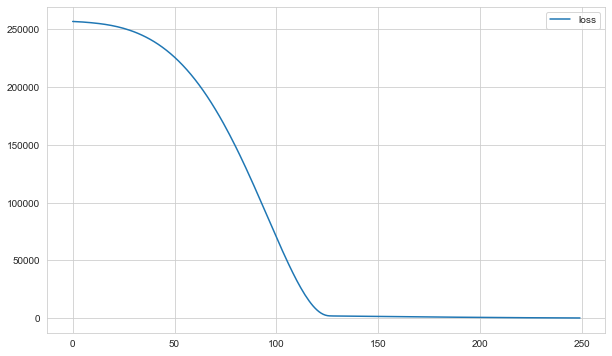

In [43]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

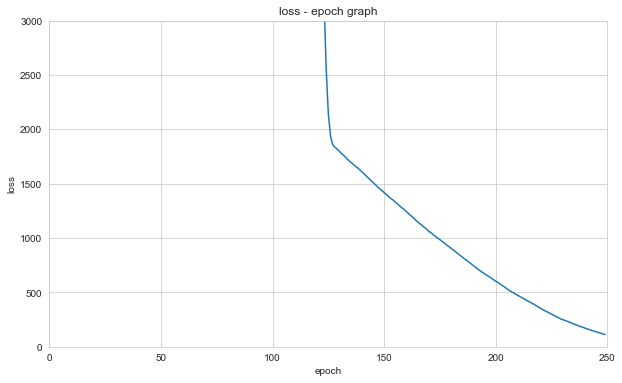

In [44]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [46]:
model.evaluate(X_train, y_train, verbose=0)

110.15507507324219

In [47]:
model.evaluate(X_test, y_test, verbose=0)

105.80056762695312

In [48]:
y_pred = model.predict(X_test)

In [49]:
explained_variance_score(y_test, y_pred)

0.9880119838350392

In [50]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
270,564.368,560.109
136,415.443,422.591
64,698.410,682.171
9,451.804,453.917
171,477.321,475.957
212,503.050,508.290
256,553.905,547.217
190,433.423,445.058
198,497.465,493.879
299,410.538,419.592


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

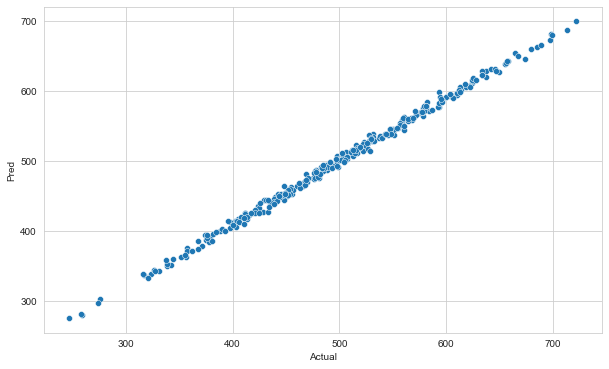

In [51]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [52]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [53]:
eval_metric(y_test, y_pred)

r2_score: 0.9879663103369111 
mae: 8.244352924482918 
mse: 105.80058056962699 
rmse: 10.285940918050569


## Final Model and Model Deployment

In [54]:
scaler = MinMaxScaler().fit(X)

In [55]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [56]:
X_scaled = scaler.transform(X)

In [57]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 257442.1250
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 257389.7812
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 257338.8906
Epoch 4/250
32/32 [==============================] - 0s 927us/step - loss: 257275.7188
Epoch 5/250
32/32 [==============================] - 0s 932us/step - loss: 257192.7656
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 257089.0312
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 256958.2812
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 256796.7500
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 256599.9219
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 256361.8438
Epoch 11/250
32/32 [==============================] - 0s 2ms/step - loss: 256076.9531
Epoch 12/250
32/32 [==============================] - 0s 2m

32/32 [==============================] - 0s 965us/step - loss: 1878.2502
Epoch 97/250
32/32 [==============================] - 0s 836us/step - loss: 1840.2150
Epoch 98/250
32/32 [==============================] - 0s 1ms/step - loss: 1795.8676
Epoch 99/250
32/32 [==============================] - 0s 772us/step - loss: 1751.6082
Epoch 100/250
32/32 [==============================] - 0s 1ms/step - loss: 1709.7902
Epoch 101/250
32/32 [==============================] - 0s 881us/step - loss: 1665.2878
Epoch 102/250
32/32 [==============================] - 0s 1ms/step - loss: 1621.0198
Epoch 103/250
32/32 [==============================] - 0s 772us/step - loss: 1580.5565
Epoch 104/250
32/32 [==============================] - 0s 1ms/step - loss: 1532.8055
Epoch 105/250
32/32 [==============================] - 0s 1ms/step - loss: 1498.8610
Epoch 106/250
32/32 [==============================] - 0s 1ms/step - loss: 1455.8363
Epoch 107/250
32/32 [==============================] - 0s 771us/step - l

Epoch 193/250
32/32 [==============================] - 0s 868us/step - loss: 24.8041
Epoch 194/250
32/32 [==============================] - 0s 1ms/step - loss: 24.7722
Epoch 195/250
32/32 [==============================] - 0s 933us/step - loss: 24.7516
Epoch 196/250
32/32 [==============================] - 0s 1ms/step - loss: 24.6266
Epoch 197/250
32/32 [==============================] - 0s 901us/step - loss: 24.7250
Epoch 198/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5813
Epoch 199/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5829
Epoch 200/250
32/32 [==============================] - 0s 2ms/step - loss: 24.7954
Epoch 201/250
32/32 [==============================] - 0s 2ms/step - loss: 24.7782
Epoch 202/250
32/32 [==============================] - 0s 2ms/step - loss: 24.4320
Epoch 203/250
32/32 [==============================] - 0s 2ms/step - loss: 24.5093
Epoch 204/250
32/32 [==============================] - 0s 2ms/step - loss: 24.774

H5 is a file format to store structured data, it's not a model by itself. Keras saves models in this format as it can easily store the weights and model configuration in a single file.

In [58]:
model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

## Prediction-1

In [59]:
from tensorflow.keras.models import load_model

In [60]:
model_fake_reg = load_model('model_fake_reg.h5')

In [61]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

In [62]:
sample = [[998, 1000]]

In [63]:
sample_scaled = scaler_fake_reg.transform(sample)

In [64]:
model_fake_reg.predict(sample_scaled)

array([[425.0285]], dtype=float32)

## Prediction-2

In [65]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [66]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [67]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [68]:
model_fake_reg.predict(sample_scaled)

array([[388.72964],
       [346.94922],
       [305.13837],
       [263.32748],
       [221.51665]], dtype=float32)